In [ ]:

import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
import seaborn as sns
from collections import Counter

In [ ]:
%%time
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tqdm import tqdm
from collections import defaultdict

def load_dataset(image_folder, img_size=(299, 299)):
    images = []
    labels = []
    class_names = []
    class_counts = defaultdict(int)
    class_hierarchy = defaultdict(set)

    print(f"\n📁 Scanning dataset from: {image_folder}\n")

    for root, dirs, files in os.walk(image_folder):
        if not files:
            continue

        rel_path = os.path.relpath(root, image_folder)
        parts = rel_path.split(os.sep)

        if len(parts) > 1:
            parent_class = parts[0]
            subclass_name = parts[1]
            class_hierarchy[parent_class].add(subclass_name)
            class_name = f"{parent_class}/{subclass_name}"
        else:
            class_name = parts[0]

        if class_name not in class_names:
            class_names.append(class_name)
        label = class_names.index(class_name)

        for img_name in tqdm(files, desc=f"Loading '{class_name}'", unit="img"):
            if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            img_path = os.path.join(root, img_name)
            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(label)
                class_counts[class_name] += 1
            except Exception as e:
                print(f"❌ Skipping {img_path}: {e}")

    # ✅ Move summary and return out of the loop
    print("\n📊 Dataset Summary:")
    for parent, subclasses in class_hierarchy.items():
        print(f"Main Class: {parent}")
        for subclass in subclasses:
            cname = f"{parent}/{subclass}"
            print(f" └── Subclass: {subclass} ({class_counts[cname]} images)")

    for cname in class_names:
        if '/' not in cname:
            print(f"Class: {cname} ({class_counts[cname]} images)")

    return np.array(images), np.array(labels), class_names


image_folder = r"/content/drive/MyDrive/Gray mold iior/graymold"
X, y, class_names = load_dataset(image_folder)




📁 Scanning dataset from: /content/drive/MyDrive/Gray mold iior/graymold



Loading 'diseased/Late symptoms': 100%|██████████| 147/147 [00:48<00:00,  3.05img/s]



📊 Dataset Summary:
Main Class: diseased
 └── Subclass: Early signs symptoms (69 images)
 └── Subclass: Late symptoms (147 images)
Class: . (0 images)
Class: healthy (415 images)
CPU times: user 59.9 s, sys: 13.1 s, total: 1min 13s
Wall time: 3min 22s


<timed exec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



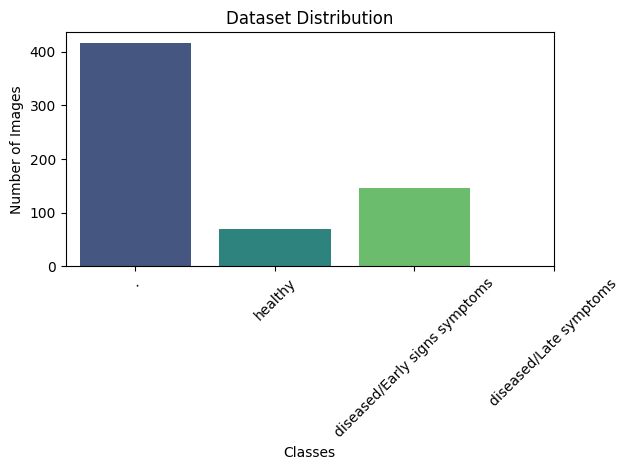

CPU times: user 213 ms, sys: 4.51 ms, total: 218 ms
Wall time: 294 ms


In [ ]:
%%time
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data_distribution(labels, class_names):
    label_counts = Counter(labels)
    sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title("Dataset Distribution")
    plt.tight_layout()
    plt.show()


plot_data_distribution(y, class_names)



📊 Balanced Dataset Distribution:


<timed exec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



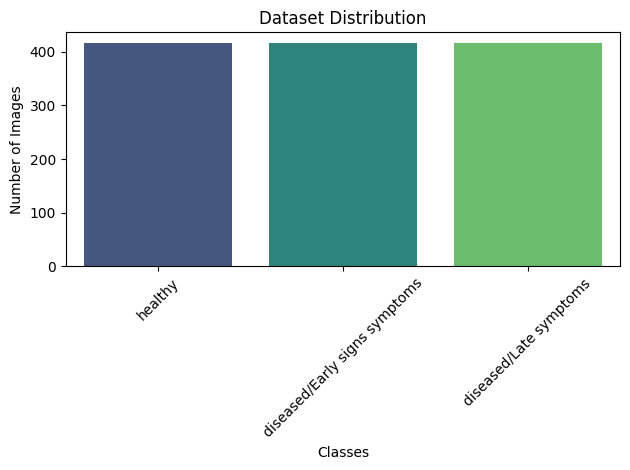

CPU times: user 348 ms, sys: 1.23 s, total: 1.58 s
Wall time: 1.66 s


In [ ]:
'''%%time
def balance_dataset_to_max(X, y, paths):
    label_counts = Counter(y)
    max_count = max(label_counts.values())

    balanced_X, balanced_y, balanced_paths = [], [], []
    for label in label_counts:
        idxs = np.where(y == label)[0]
        if len(idxs) < max_count:
            selected_idxs = np.random.choice(idxs, max_count, replace=True)
        else:
            selected_idxs = idxs
        # Use list comprehension for balanced_X and balanced_paths for efficiency and clarity
        balanced_X.extend([X[i] for i in selected_idxs])
        balanced_y.extend([label] * len(selected_idxs))
        balanced_paths.extend([paths[i] for i in selected_idxs])


    return np.array(balanced_X), np.array(balanced_y), balanced_paths

X_bal, y_bal, paths_bal = balance_dataset_to_max(X, y, paths)

# Print out the balance graph after balancing
# Make sure the plot_data_distribution function is defined in a previous cell
# (It is defined in ipython-input-5 based on the notebook structure)
print("\n📊 Balanced Dataset Distribution:") 
plot_data_distribution(y_bal, class_names)'''

In [ ]:
%%time
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp, paths_train, paths_temp = train_test_split(
    # add train to this one X_bal, y_bal, paths_bal, test_size=0.3, stratify=y_bal, random_state=SEED
)

X_val, X_test, y_val, y_test, paths_val, paths_test = train_test_split(
    X_temp, y_temp, paths_temp, test_size=0.5, stratify=y_temp, random_state=SEED
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
print(f"Train size: {len(X_train)} samples")
print(f"Validation size: {len(X_val)} samples")
print(f"Test size: {len(X_test)} samples")

Train: (871, 299, 299, 3), Validation: (187, 299, 299, 3), Test: (187, 299, 299, 3)
Train size: 871 samples
Validation size: 187 samples
Test size: 187 samples
CPU times: user 319 ms, sys: 1.02 s, total: 1.34 s
Wall time: 1.46 s


In [ ]:
import subprocess
import time
import tensorflow.keras.backend as K

# Start timing
start_time = time.time()

# ---------------- Step 6: Train on InceptionV3 ---------------- #
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers[-30:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(256, activation="relu")(x)
output_layer = Dense(len(class_names), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.00001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=4,
    callbacks=[early_stopping, model_checkpoint]
)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# ---------------- GPU Stats ---------------- #
def get_gpu_stats():
    try:
        output = subprocess.check_output(
            ['nvidia-smi', '--query-gpu=name,memory.used,memory.total,utilization.gpu,utilization.memory,power.draw', '--format=csv,noheader,nounits']
        ).decode('utf-8').strip()
        stats = output.split(',')
        return {
            'GPU Name': stats[0].strip(),
            'Memory Used (MB)': f"{stats[1].strip()} / {stats[2].strip()}",
            'GPU Load (%)': stats[3].strip(),
            'Memory Load (%)': stats[4].strip(),
            'Power Usage (W)': stats[5].strip()
        }
    except Exception as e:
        return {"GPU Stats": "Not available (maybe running on CPU)", "Error": str(e)}

gpu_stats = get_gpu_stats()

# ---------------- Final Training Details ---------------- #
final_epoch = len(history.history['accuracy'])
final_acc = history.history['accuracy'][-1]
final_loss = history.history['loss'][-1]

print("\n📊 Average GPU Metrics:")
for k, v in gpu_stats.items():
    print(f"  {k}: {v}")

print("\n🏁 Final Training Details:")
print(f"  Total Epochs: {final_epoch}")
print(f"  Final Loss: {final_loss:.4f}")
print(f"  Final Accuracy: {final_acc:.4f}")

print("\n⏱️ Timing:")
print(f"  CPU Time: {elapsed_time:.2f} seconds")
print(f"  Wall Time: {elapsed_time:.2f} seconds")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 153s 345ms/step - accuracy: 0.4119 - loss: 1.0598 - val_accuracy: 0.8021 - val_loss: 0.7400
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 49s 101ms/step - accuracy: 0.7797 - loss: 0.7308 - val_accuracy: 0.8877 - val_loss: 0.4243
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 43s 112ms/step - accuracy: 0.8784 - loss: 0.4600 - val_accuracy: 0.9144 - val_loss: 0.2803
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.9361 - loss: 0.2938 - val_accuracy: 0.9465 - val_loss: 0.1963
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 46s 125ms/step - accuracy: 0.9612 - loss: 0.1941 - val_accuracy: 0.9572 - val_loss: 0.1489
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.9832 - loss: 0.1368 - val_accuracy: 0.9572 - val_loss: 0.1275
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.9744 - loss: 0.1172 - val_accuracy: 0.9626 - val_loss: 0.1014
Epoch 8/20
218/218 ━━━━━━━━━━━━

In [ ]:
# ---------------- Step 7: Model Summary & Params ---------------- #
# model.summary()
%%time
total_params = model.count_params()
trainable_params = np.sum([K.count_params(w) for w in model.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model.non_trainable_weights])

print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-trainable Parameters: {non_trainable_params:,}")


Total Parameters: 22,098,851
Trainable Parameters: 22,064,419
Non-trainable Parameters: 34,432
CPU times: user 7.14 ms, sys: 0 ns, total: 7.14 ms
Wall time: 7.43 ms


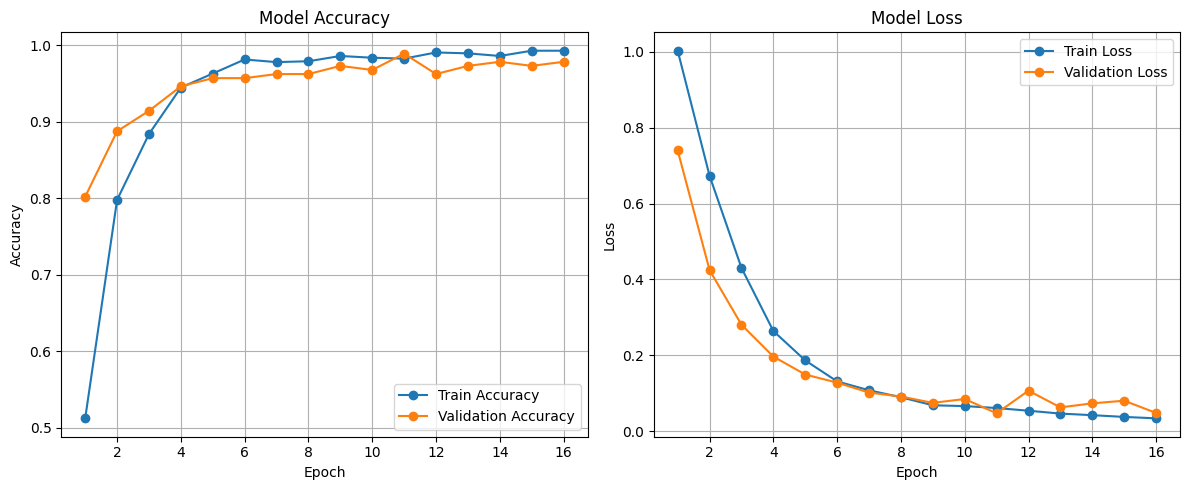

CPU times: user 297 ms, sys: 8.54 ms, total: 306 ms
Wall time: 329 ms


In [ ]:
%%time
plt.figure(figsize=(12, 5))

epochs_range = list(range(1, len(history.history['accuracy']) + 1))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Train Loss', marker='o')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step

✅ Test Accuracy: 0.9679
🧪 Test Loss: 0.0925

📄 Classification Report:
                               precision    recall  f1-score   support

                      healthy       1.00      1.00      1.00        62
diseased/Early signs symptoms       0.91      1.00      0.95        63
       diseased/Late symptoms       1.00      0.90      0.95        62

                     accuracy                           0.97       187
                    macro avg       0.97      0.97      0.97       187
                 weighted avg       0.97      0.97      0.97       187



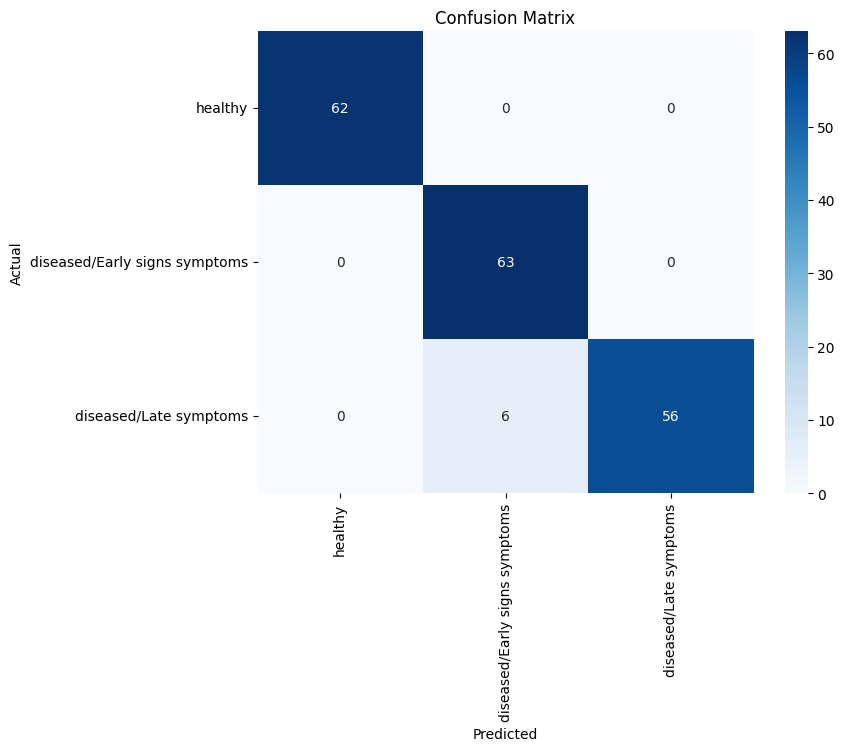

CPU times: user 31.5 s, sys: 2.1 s, total: 33.6 s
Wall time: 36 s


In [ ]:
%%time
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test  # <-- Fix here (remove argmax)

# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"🧪 Test Loss: {test_loss:.4f}")

# Classification report
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [ ]:
for path, true, pred in zip(paths_test, y_test, y_pred):
    print(f"{os.path.basename(path):<20} | Ground Truth: {class_names[true]:<30} | Predicted: {class_names[pred]}")


DSC_1582.JPG         | Ground Truth: healthy                        | Predicted: healthy
DSC_1002.JPG         | Ground Truth: diseased/Late symptoms         | Predicted: diseased/Late symptoms
DSC_1007.JPG         | Ground Truth: diseased/Early signs symptoms  | Predicted: diseased/Early signs symptoms
DSC_0994.JPG         | Ground Truth: diseased/Early signs symptoms  | Predicted: diseased/Early signs symptoms
P1010091.JPG         | Ground Truth: diseased/Early signs symptoms  | Predicted: diseased/Early signs symptoms
DSC_0994.JPG         | Ground Truth: diseased/Early signs symptoms  | Predicted: diseased/Early signs symptoms
DSC_0080.jpg         | Ground Truth: diseased/Late symptoms         | Predicted: diseased/Late symptoms
DSC_0081.jpg         | Ground Truth: diseased/Late symptoms         | Predicted: diseased/Late symptoms
DSC_0094.jpg         | Ground Truth: diseased/Late symptoms         | Predicted: diseased/Late symptoms
DSC_5157.JPG         | Ground Truth: healthy       

In [ ]:
print("🧾 Class Label Order:")
for i, name in enumerate(class_names):
    print(f"{i} → {name}")


🧾 Class Label Order:
0 → healthy
1 → diseased/Early signs symptoms
2 → diseased/Late symptoms


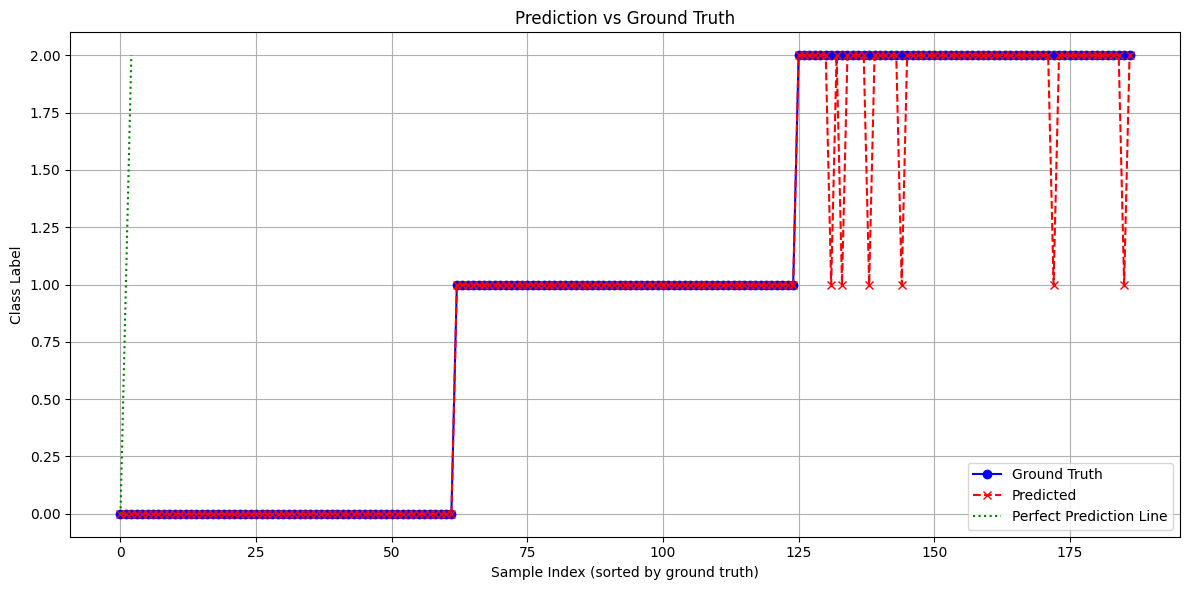

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure integer arrays for class indices
y_true = np.array(y_test)
y_pred = np.array(y_pred)

# Sort by ground truth for better visualization
sorted_indices = np.argsort(y_true)
y_true_sorted = y_true[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(y_true_sorted, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label='Predicted', marker='x', linestyle='--', color='red')

# Perfect prediction line (optional if you want diagonal reference)
plt.plot(y_true_sorted, y_true_sorted, label='Perfect Prediction Line', linestyle=':', color='green')

plt.xlabel('Sample Index (sorted by ground truth)')
plt.ylabel('Class Label')
plt.title('Prediction vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Gray mold iior/graymold/train_8.keras')

In [ ]:
# Legacy format (still works, but not recommended)
model.save('/content/drive/MyDrive/Gray mold iior/graymold/train_8.h5')
